In [5]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi
def filter_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

Exercise
三角波和方波僅具有奇次諧波； 鋸齒波同時具有偶次和奇次諧波。 方波和鋸齒波的諧波按$ 1 / f 的比例下降； 三角波的諧波像$ 1 / f ^ 2 一樣下降。 您能找到具有偶次和奇次諧波下降的波形，例如$ 1 / f ^ 2 嗎？

提示：有兩種方法可以解決此問題：可以通過添加正弦波來構造所需的信號，或者可以從與所需信號相似的信號開始並進行修改。

Solution
一種選擇是從鋸齒波開始，該鋸齒波具有我們需要的所有諧波：

In [2]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

這是頻譜的樣子。 諧波像$ 1 / f一樣下降。

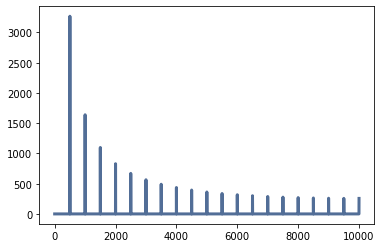

In [3]:
spectrum = wave.make_spectrum()
spectrum.plot()

如果應用在上一個練習中編寫的濾波器，我們可以使諧波像$ 1 / f ^ 2一樣下降。

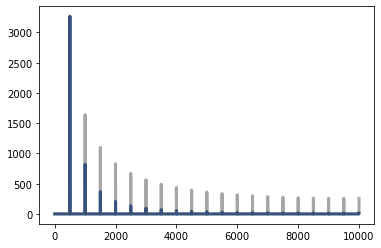

In [6]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

聽起來是這樣的：

In [7]:
wave = spectrum.make_wave()
wave.make_audio()


And here's what the waveform looks like.

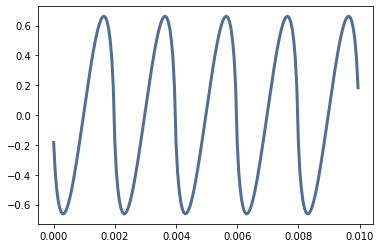

In [8]:
wave.segment(duration=0.01).plot()

這是一個有趣的形狀，但不容易看出它的功能形式是什麼。

另一種方法是將頻率和幅度正確的一系列餘弦信號相加。

In [9]:
freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(thinkdsp.CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

頻譜如下所示：

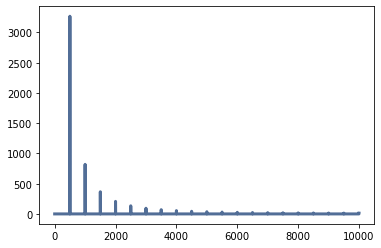

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot()

聽起來是這樣的：

In [11]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

這就是波形的樣子。

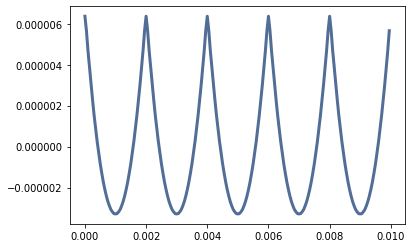

In [12]:
wave.segment(duration=0.01).plot()

如果那些看起來像拋物線，那麼您可能是對的。 thinkdsp提供了ParabolicSignal，用於計算拋物線波形。

In [13]:
wave = thinkdsp.ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

波形如下所示：

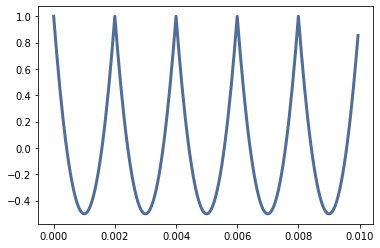

In [14]:
wave.segment(duration=0.01).plot()

拋物線信號具有偶次和奇次諧波，其下降像 1 / f ^ 2 ：

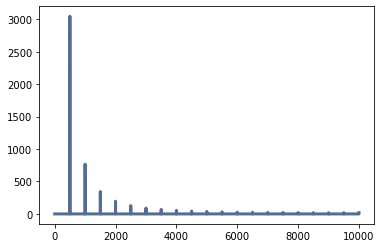

In [15]:
spectrum = wave.make_spectrum()
spectrum.plot()